<a href="https://colab.research.google.com/github/KAMESHLJ-P/SummerSchool-Assignment/blob/main/Credit_Risk_Analysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [3]:
data = pd.read_csv("/content/credit_risk_dataset.csv")
data.head()

,person_age,person_income,person_home_ownership,person_emp_length,loan_intent,loan_grade,loan_amnt,loan_int_rate,loan_status,loan_percent_income,cb_person_default_on_file,cb_person_cred_hist_length
0,22,59000,RENT,123.0,PERSONAL,D,35000,16.02,1,0.59,Y,3
1,21,9600,OWN,5.0,EDUCATION,B,1000,11.14,0,0.10,N,2
2,25,9600,MORTGAGE,1.0,MEDICAL,C,5500,12.87,1,0.57,N,3
3,23,65500,RENT,4.0,MEDICAL,C,35000,15.23,1,0.53,N,2
4,24,54400,RENT,8.0,MEDICAL,C,35000,14.27,1,0.55,Y,4


In [4]:
print(data.shape)
data.dtypes

(32581, 12)


,0
person_age,int64
person_income,int64
person_home_ownership,object
person_emp_length,float64
loan_intent,object
loan_grade,object
loan_amnt,int64
loan_int_rate,float64
loan_status,int64
loan_percent_income,float64


In [5]:
data.duplicated().sum()

165

In [6]:
data.drop_duplicates(inplace=True)
print(len(data))

32416


In [7]:
num_cols= data.select_dtypes(include=['int64', 'float64'])
num_cols

,person_age,person_income,person_emp_length,loan_amnt,loan_int_rate,loan_status,loan_percent_income,cb_person_cred_hist_length
0,22,59000,123.0,35000,16.02,1,0.59,3
1,21,9600,5.0,1000,11.14,0,0.10,2
2,25,9600,1.0,5500,12.87,1,0.57,3
3,23,65500,4.0,35000,15.23,1,0.53,2
4,24,54400,8.0,35000,14.27,1,0.55,4
...,...,...,...,...,...,...,...,...
32576,57,53000,1.0,5800,13.16,0,0.11,30
32577,54,120000,4.0,17625,7.49,0,0.15,19
32578,65,76000,3.0,35000,10.99,1,0.46,28
32579,56,150000,5.0,15000,11.48,0,0.10,26


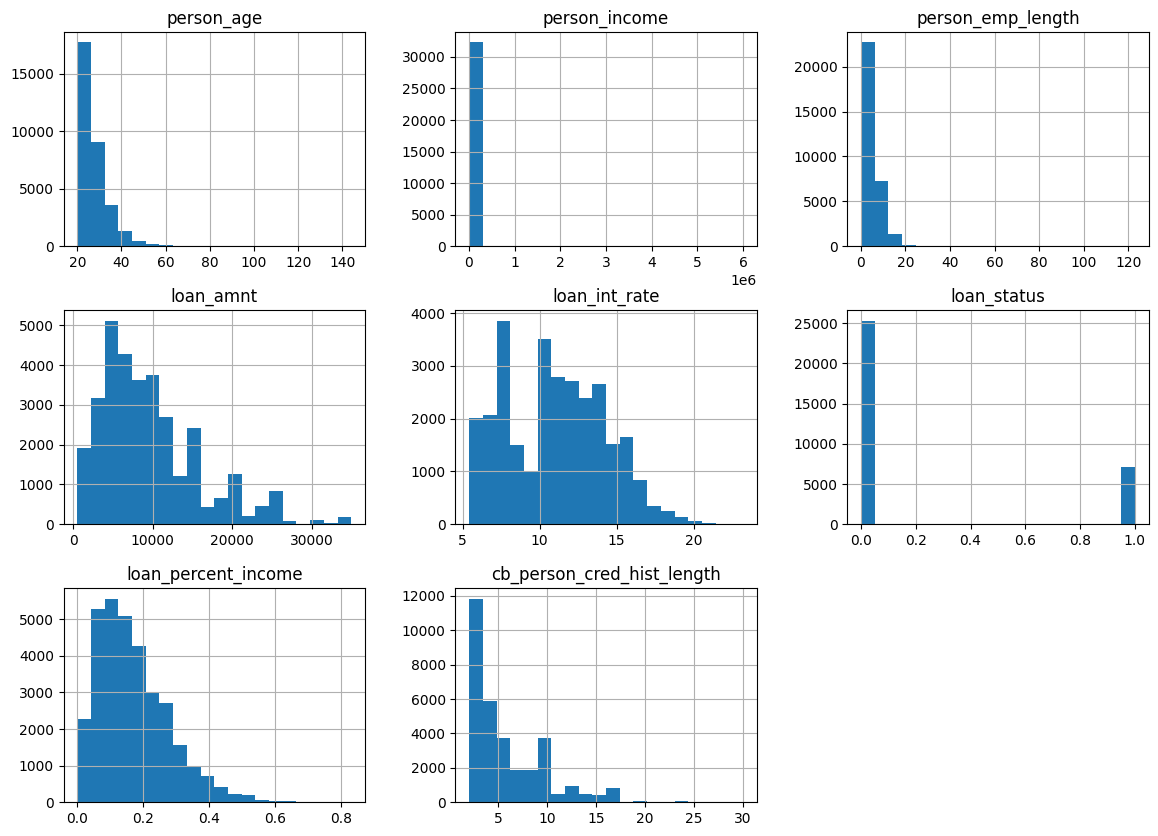

In [8]:
data.hist(bins=20, figsize=(14, 10))
plt.show()

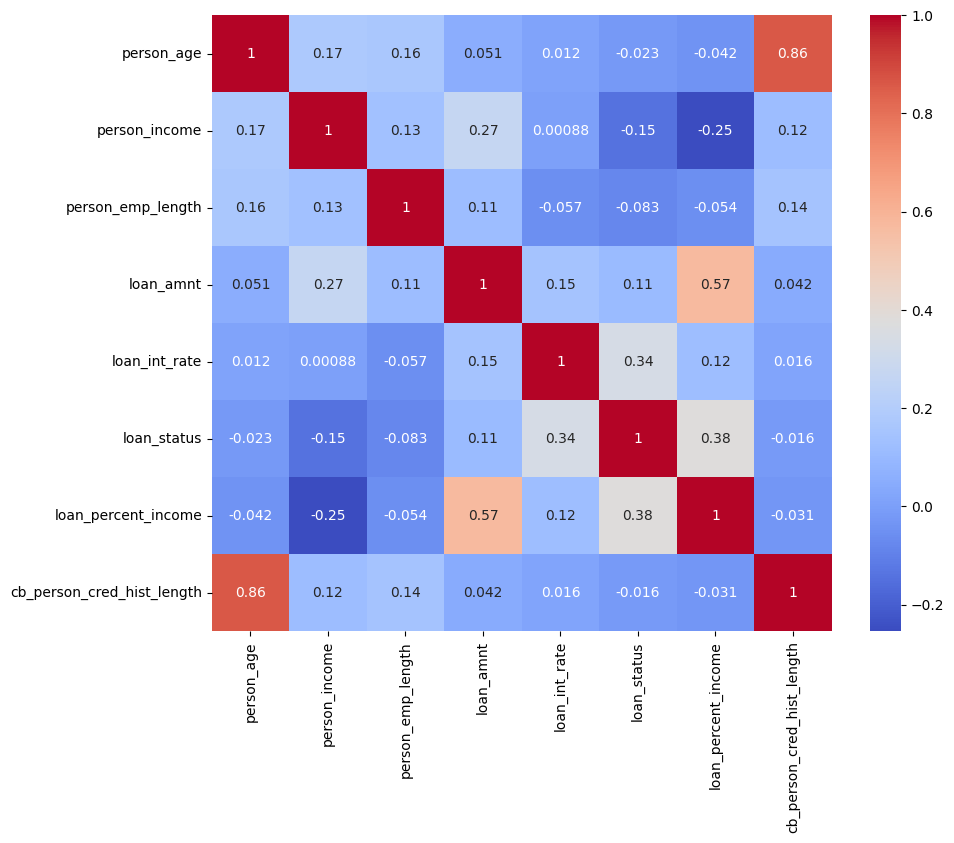

In [9]:
import seaborn as sns
# Correlation matrix
plt.figure(figsize=(10, 8))
sns.heatmap(num_cols.corr(), annot=True, cmap='coolwarm')
plt.show()

In [10]:
data.isnull().sum()

,0
person_age,0
person_income,0
person_home_ownership,0
person_emp_length,887
loan_intent,0
loan_grade,0
loan_amnt,0
loan_int_rate,3095
loan_status,0
loan_percent_income,0


In [11]:
data.dropna(axis=0,inplace=True)
data.isnull().sum()

,0
person_age,0
person_income,0
person_home_ownership,0
person_emp_length,0
loan_intent,0
loan_grade,0
loan_amnt,0
loan_int_rate,0
loan_status,0
loan_percent_income,0


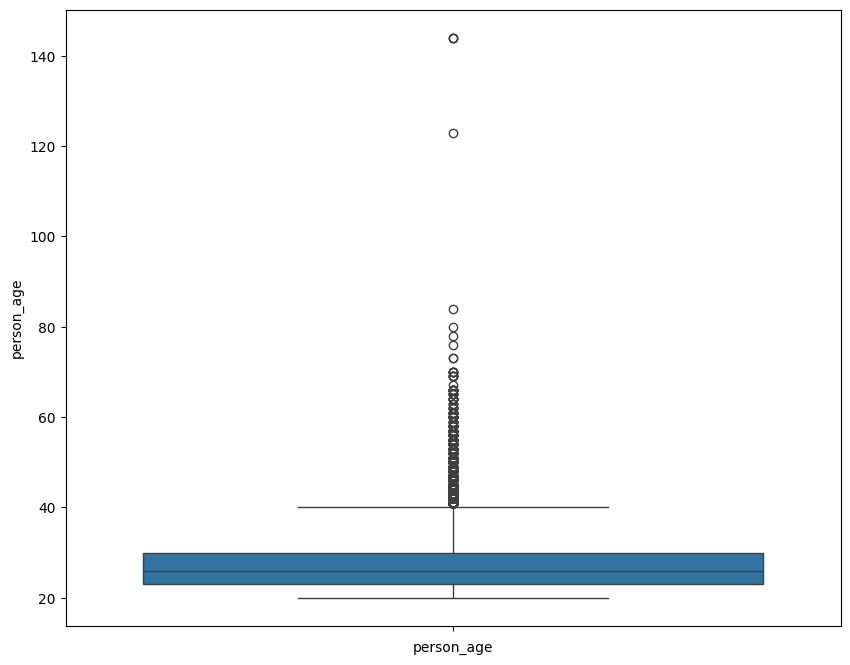

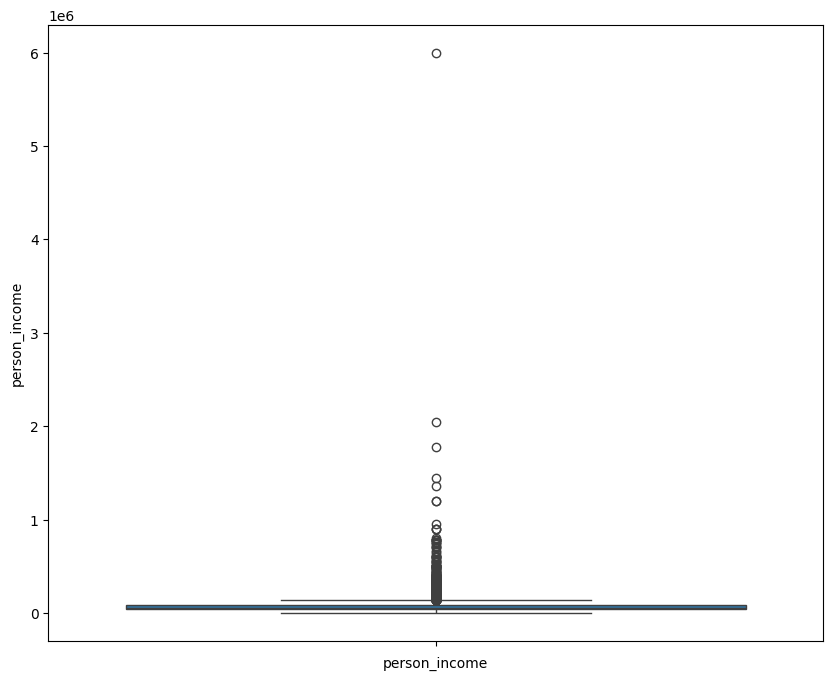

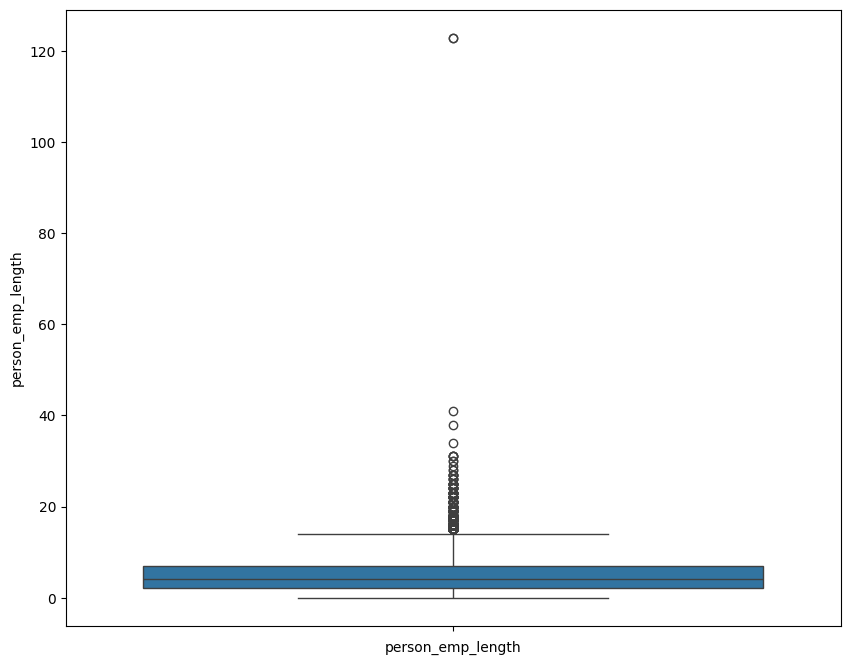

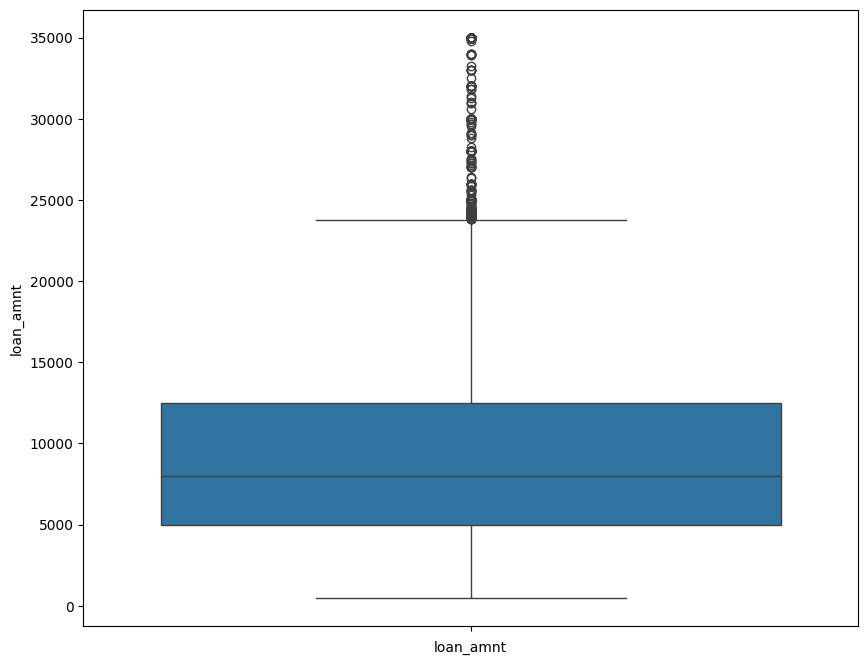

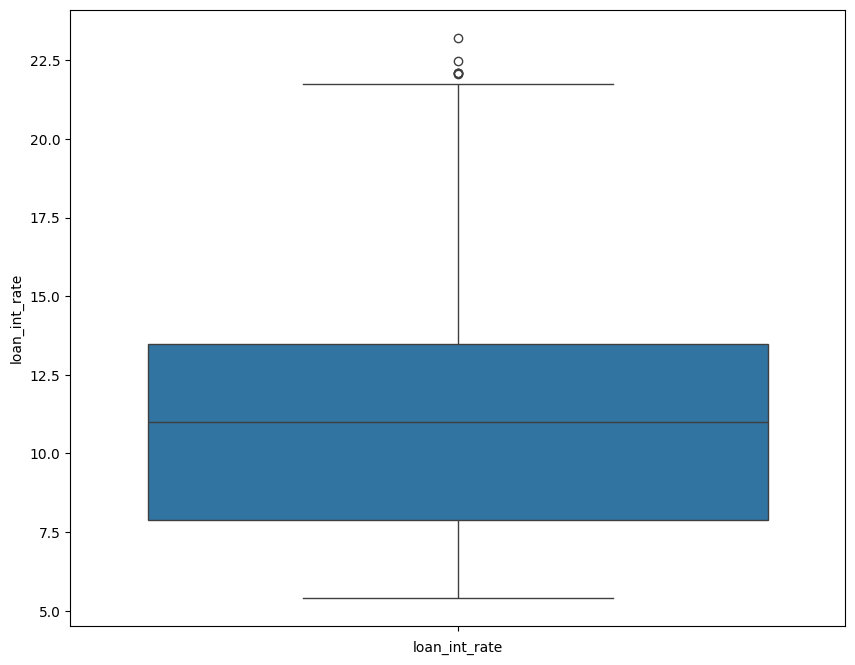

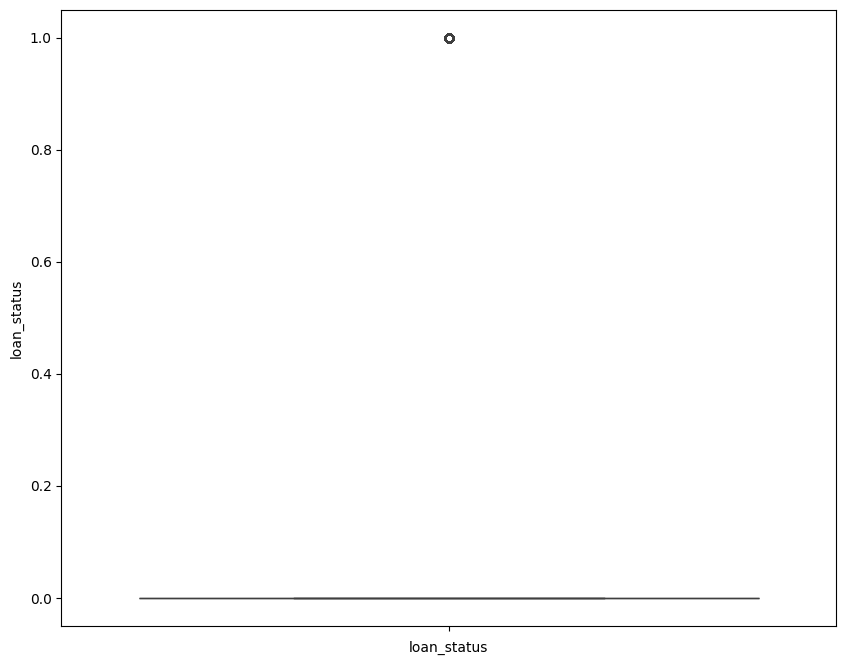

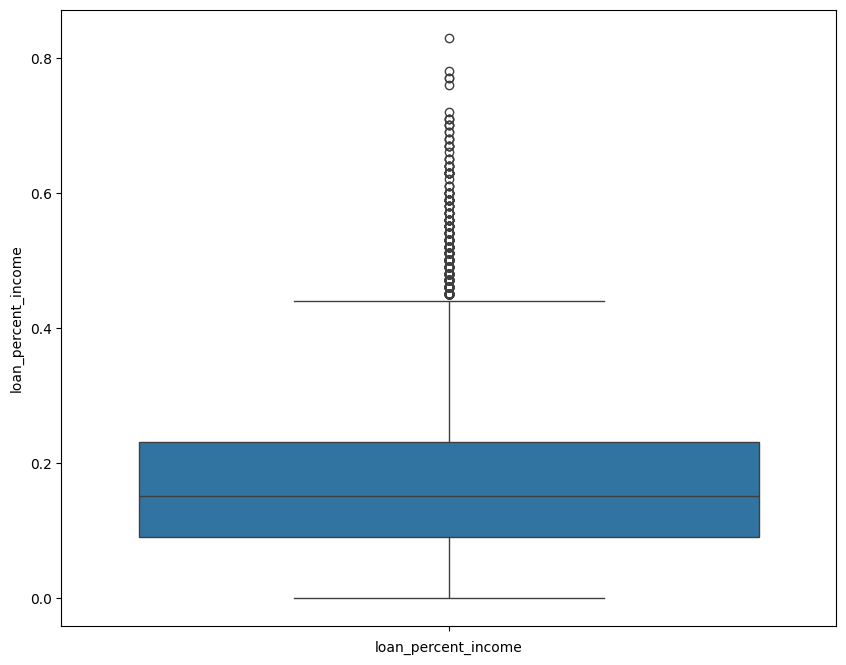

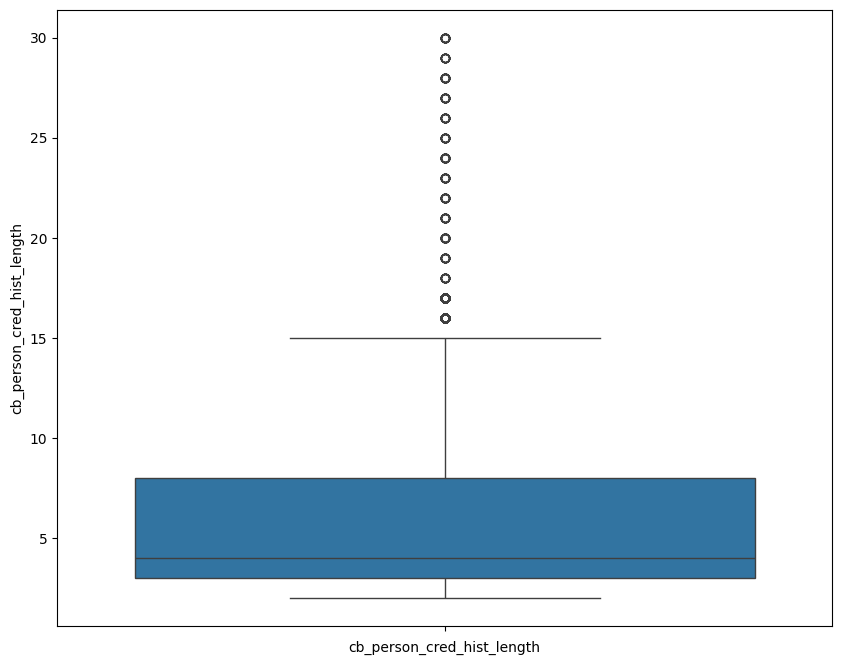

In [12]:
for column in data.select_dtypes(exclude = 'object'):
    plt.figure(figsize=(10,8))
    sns.boxplot(data = data[column])
    plt.xlabel(column)

In [13]:
data = data[data["person_age"]<85]
data = data[data["person_income"]<1000000]
data = data[data["person_emp_length"]<50]
print(data.shape)

(28489, 12)


In [14]:
for i in ["person_home_ownership", "loan_intent", "loan_grade", "cb_person_default_on_file", "loan_status"]:
  print(data[i].value_counts(), "\n")

person_home_ownership
RENT        14493
MORTGAGE    11730
OWN          2173
OTHER          93
Name: count, dtype: int64 

loan_intent
EDUCATION            5667
MEDICAL              5268
VENTURE              4964
PERSONAL             4857
DEBTCONSOLIDATION    4546
HOMEIMPROVEMENT      3187
Name: count, dtype: int64 

loan_grade
A    9340
B    9092
C    5678
D    3242
E     869
F     209
G      59
Name: count, dtype: int64 

cb_person_default_on_file
N    23401
Y     5088
Name: count, dtype: int64 

loan_status
0    22302
1     6187
Name: count, dtype: int64 



In [15]:
print(data["person_home_ownership"].unique())
print(data["loan_intent"].unique())
print(data["loan_grade"].unique())
print(data["cb_person_default_on_file"].unique())

['OWN' 'MORTGAGE' 'RENT' 'OTHER']
['EDUCATION' 'MEDICAL' 'VENTURE' 'PERSONAL' 'HOMEIMPROVEMENT'
 'DEBTCONSOLIDATION']
['B' 'C' 'A' 'D' 'E' 'F' 'G']
['N' 'Y']


In [16]:
data = data.reset_index(drop=True)
data

,person_age,person_income,person_home_ownership,person_emp_length,loan_intent,loan_grade,loan_amnt,loan_int_rate,loan_status,loan_percent_income,cb_person_default_on_file,cb_person_cred_hist_length
0,21,9600,OWN,5.0,EDUCATION,B,1000,11.14,0,0.10,N,2
1,25,9600,MORTGAGE,1.0,MEDICAL,C,5500,12.87,1,0.57,N,3
2,23,65500,RENT,4.0,MEDICAL,C,35000,15.23,1,0.53,N,2
3,24,54400,RENT,8.0,MEDICAL,C,35000,14.27,1,0.55,Y,4
4,21,9900,OWN,2.0,VENTURE,A,2500,7.14,1,0.25,N,2
...,...,...,...,...,...,...,...,...,...,...,...,...
28484,57,53000,MORTGAGE,1.0,PERSONAL,C,5800,13.16,0,0.11,N,30
28485,54,120000,MORTGAGE,4.0,PERSONAL,A,17625,7.49,0,0.15,N,19
28486,65,76000,RENT,3.0,HOMEIMPROVEMENT,B,35000,10.99,1,0.46,N,28
28487,56,150000,MORTGAGE,5.0,PERSONAL,B,15000,11.48,0,0.10,N,26


In [17]:
from sklearn.preprocessing import LabelEncoder
lencoder = LabelEncoder()
for column in data.select_dtypes(include='object'):
    data[column] = lencoder.fit_transform(data[column])

data

,person_age,person_income,person_home_ownership,person_emp_length,loan_intent,loan_grade,loan_amnt,loan_int_rate,loan_status,loan_percent_income,cb_person_default_on_file,cb_person_cred_hist_length
0,21,9600,2,5.0,1,1,1000,11.14,0,0.10,0,2
1,25,9600,0,1.0,3,2,5500,12.87,1,0.57,0,3
2,23,65500,3,4.0,3,2,35000,15.23,1,0.53,0,2
3,24,54400,3,8.0,3,2,35000,14.27,1,0.55,1,4
4,21,9900,2,2.0,5,0,2500,7.14,1,0.25,0,2
...,...,...,...,...,...,...,...,...,...,...,...,...
28484,57,53000,0,1.0,4,2,5800,13.16,0,0.11,0,30
28485,54,120000,0,4.0,4,0,17625,7.49,0,0.15,0,19
28486,65,76000,3,3.0,2,1,35000,10.99,1,0.46,0,28
28487,56,150000,0,5.0,4,1,15000,11.48,0,0.10,0,26


In [18]:
X, y = data.drop("loan_status", axis=1), data["loan_status"]

In [19]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X[X.columns] = scaler.fit_transform(X[X.columns])
X

,person_age,person_income,person_home_ownership,person_emp_length,loan_intent,loan_grade,loan_amnt,loan_int_rate,loan_percent_income,cb_person_default_on_file,cb_person_cred_hist_length
0,-1.088881,-1.205534,0.221692,0.054210,-0.885031,-0.196513,-1.368080,0.029223,-0.653923,-0.466290,-0.940795
1,-0.440747,-1.205534,-1.172518,-0.936573,0.271452,0.656910,-0.656975,0.564712,3.764975,-0.466290,-0.693098
2,-0.764814,-0.013387,0.918796,-0.193486,0.271452,0.656910,4.004716,1.295204,3.388899,-0.466290,-0.940795
3,-0.602781,-0.250110,0.918796,0.797297,0.271452,0.656910,4.004716,0.998055,3.576937,2.144587,-0.445401
4,-1.088881,-1.199136,0.221692,-0.688877,1.427936,-1.049936,-1.131045,-1.208901,0.756364,-0.466290,-0.940795
...,...,...,...,...,...,...,...,...,...,...,...
28484,4.744321,-0.279967,-1.172518,-0.936573,0.849694,0.656910,-0.609568,0.654475,-0.559904,-0.466290,5.994722
28485,4.258221,1.148903,-1.172518,-0.193486,0.849694,-1.049936,1.259059,-1.100565,-0.183827,-0.466290,3.270055
28486,6.040588,0.210540,0.918796,-0.441182,-0.306789,-0.196513,4.004716,-0.017207,2.730765,-0.466290,5.499328
28487,4.582287,1.788696,-1.172518,0.054210,0.849694,-0.196513,0.844248,0.134464,-0.653923,-0.466290,5.003934


In [20]:
y

,loan_status
0,0
1,1
2,1
3,1
4,1
...,...
28484,0
28485,0
28486,1
28487,0


In [21]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, shuffle=True)

# PCA

In [ ]:
C = np.cov(X_train.T)
eigvals, eigvecs = np.linalg.eig(C)
eigvals.sort()
eigvals

In [ ]:
value = 0
for i in range(len(eigvals)):
  value += eigvals[len(eigvals) - i - 1]
  if value/np.sum(eigvals) >= 0.95:
    print(i)
    break

7


# Linear Regression

## Closed form expression

In [22]:
# Closed form expression
w_ML = np.dot(np.linalg.inv(np.dot(X_train.T,X_train)),np.dot(X_train.T,y_train))

In [29]:
Y_pred = np.matmul(w_ML, X_test.T)
Y_pred = 1/(1 + np.exp(-Y_pred))
Y_pred = np.where(Y_pred >= 0.55, 1, 0)
data = y_test - Y_pred
accuracy = sum(1 for y_pred, y_true in zip(Y_pred, y_test) if y_pred == y_true) / len(y_test)
accuracy*100

84.02948402948402

Text(0, 0.5, 'Value of ||w_t - w_ML||')

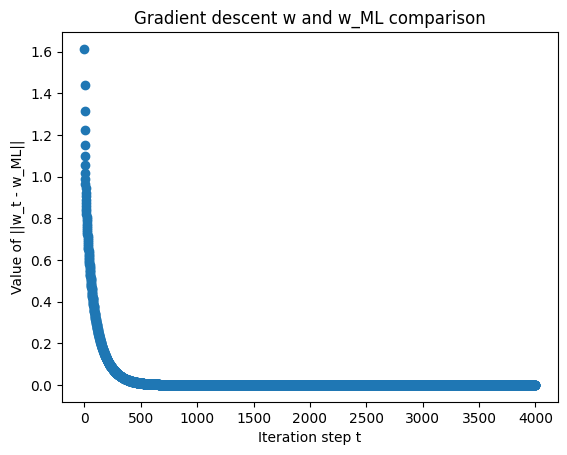

In [ ]:
import math
# Gradient descent algorithm for linear regression
w_gd = np.random.uniform(-1,1,11)                         # A Vector of 11 values to initiate the gradient descent
wt = np.zeros(4000)                                        # Initiating wt a distance matrix for comparing gradient descent and maximum likelihood w
T = np.dot(X_train.T,X_train)
XY = np.dot(X_train.T,y_train)
for t in range(len(wt)):
  w_gd = w_gd - (0.000003)*2*(np.dot(T,w_gd)-XY)           # Experimented with various step size and 0.000003 gave least error
  wt[t] = np.array(math.dist(w_gd,w_ML))
plt.scatter(range(4000),wt)                                # Plot the data
plt.title("Gradient descent w and w_ML comparison")
plt.xlabel("Iteration step t")
plt.ylabel("Value of ||w_t - w_ML||")

In [ ]:
Y_pred = np.matmul(w_gd, X_test.T)
Y_pred = 1/(1 + np.exp(-Y_pred))
Y_pred = np.where(Y_pred >= 0.5, 1, 0)
data = y_test - Y_pred
accuracy = sum(1 for y_pred, y_true in zip(Y_pred, y_test) if y_pred == y_true) / len(y_test)
accuracy*100

72.21832221832221

# Logistic regression

In [ ]:
import torch
import torch.nn as nn
class LogisticRegression(nn.Module):
  def __init__(self, n_input_features):
    super(LogisticRegression, self).__init__()
    self.linear = nn.Linear(n_input_features, 1)

  def forward(self, x):
    y_predicted = torch.sigmoid(self.linear(x))
    return y_predicted

model = LogisticRegression(11)

In [ ]:
learning_rate_accuracy = {}
learning_rates = [0.1, 0.001, 0.0001, 0.00001]
for learning_rate in learning_rates:
  criterion = nn.BCELoss()
  optimiser = torch.optim.SGD(model.parameters(), lr = learning_rate)
  num_epochs = 1000
  for epoch in range(num_epochs):
    #forward pass
    y_predicted = model(torch.Tensor(X_train.to_numpy()))
    loss = criterion(y_predicted, torch.Tensor(y_train.to_numpy()).reshape(-1,1))
    #backward pass
    loss.backward()
    #update weights
    optimiser.step()
    optimiser.zero_grad()
    #plot
    if (epoch+1) % 100 == 0:
      print(f'epoch : {epoch+1}, loss = {loss.item():.4f}')

  #check accuracy
  with torch.no_grad():
    y_predicted = model(torch.Tensor(X_test.to_numpy()))
    y_predicted_cls = y_predicted.round()
    acc = y_predicted_cls.eq(torch.Tensor(y_test.to_numpy()).reshape(-1,1)).sum() / float(y_test.shape[0])
    print(f'accuracy = {acc*100:.4f}')
    learning_rate_accuracy[learning_rate] = acc

epoch : 100, loss = 0.3658
epoch : 200, loss = 0.3658
epoch : 300, loss = 0.3658
epoch : 400, loss = 0.3658
epoch : 500, loss = 0.3658
epoch : 600, loss = 0.3658
epoch : 700, loss = 0.3658
epoch : 800, loss = 0.3658
epoch : 900, loss = 0.3658
epoch : 1000, loss = 0.3658
accuracy = 84.4156
epoch : 100, loss = 0.3658
epoch : 200, loss = 0.3658
epoch : 300, loss = 0.3658
epoch : 400, loss = 0.3658
epoch : 500, loss = 0.3658
epoch : 600, loss = 0.3658
epoch : 700, loss = 0.3658
epoch : 800, loss = 0.3658
epoch : 900, loss = 0.3658
epoch : 1000, loss = 0.3658
accuracy = 84.4156
epoch : 100, loss = 0.3658
epoch : 200, loss = 0.3658
epoch : 300, loss = 0.3658
epoch : 400, loss = 0.3658
epoch : 500, loss = 0.3658
epoch : 600, loss = 0.3658
epoch : 700, loss = 0.3658
epoch : 800, loss = 0.3658
epoch : 900, loss = 0.3658
epoch : 1000, loss = 0.3658
accuracy = 84.4156
epoch : 100, loss = 0.3658
epoch : 200, loss = 0.3658
epoch : 300, loss = 0.3658
epoch : 400, loss = 0.3658
epoch : 500, loss = 0.

MLP

In [30]:
# Import necessary libraries for the mentioned models
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import MultinomialNB
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier, BaggingClassifier
from xgboost import XGBClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

In [31]:
# List of models
models = {
    'Support Vector Machine': SVC(probability=True),
    'K-Nearest Neighbors': KNeighborsClassifier(),
    'Decision Tree': DecisionTreeClassifier(),
    'Random Forest': RandomForestClassifier(),
    'Bagging Classifier': BaggingClassifier(),
    'XGBoost': XGBClassifier(),}

In [32]:
# Train and evaluate each model
model_results = {}
for name, model in models.items():
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    y_pred_probability = model.predict_proba(X_test)[:, 1] if hasattr(model, 'predict_proba') else y_pred

    model_results[name] = {
        'Accuracy': accuracy_score(y_test, y_pred),
        'Precision': precision_score(y_test, y_pred),
        'Recall': recall_score(y_test, y_pred),
        'F1 Score': f1_score(y_test, y_pred),
    }

# Convert results to DataFrame
results_df = pd.DataFrame(model_results).T
print(results_df)

                        Accuracy  Precision    Recall  F1 Score
Support Vector Machine  0.887329   0.846243  0.589847  0.695157
K-Nearest Neighbors     0.869252   0.763830  0.578566  0.658414
Decision Tree           0.879431   0.710807  0.752619  0.731115
Random Forest           0.924710   0.952116  0.688961  0.799439
AdaBoost                0.885223   0.789163  0.645447  0.710106
Bagging Classifier      0.927167   0.942184  0.709106  0.809195
XGBoost                 0.934187   0.953878  0.733280  0.829157
